In [31]:
# Tugas Besar 1 IF2211 Probabilitas dan Statistika
# 13519116 Jeane Mikha Erwansyah
# 13519118 Cynthia Rusadi

import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('Gandum.csv', header=None)
df.rename(columns={0:'id', 1:'Daerah', 2:'SumbuUtama', 3:'SumbuKecil',
                   4:'Keunikan', 5:'AreaBulatan', 6:'Diameter', 7:'KadarAir',
                   8:'Keliling', 9:'Bulatan', 10:'Ransum', 11:'Kelas'},
          inplace=True)
df = df.set_index("id")

# Nomor 1

In [32]:
dftarget = df.drop(['Kelas'], axis=1)

pd.concat([dftarget.describe().T,
           dftarget.var().rename('var'),
           dftarget.skew().rename('skew'),
           dftarget.kurt().rename('kurt')], axis=1).T

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4801.246000,116.045171,53.715246,0.878764,4.937048e+03,77.771158,0.648372,281.479722,0.761737,2.150915
std,986.395491,18.282626,4.071075,0.036586,1.011696e+03,8.056867,0.094367,37.335402,0.061702,0.249767
min,2522.000000,74.133114,39.906517,0.719916,2.579000e+03,56.666658,0.409927,197.015000,0.174590,1.440796
25%,4042.750000,104.116098,51.193576,0.863676,4.170250e+03,71.745308,0.572632,255.883000,0.731991,1.983939
50%,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599
75%,5495.500000,129.046792,56.325158,0.907578,5.654250e+03,83.648598,0.726633,306.062500,0.796361,2.381612
max,7453.000000,227.928583,68.977700,0.914001,7.720000e+03,97.413830,0.878899,488.837000,0.904748,2.464809
var,972976.065615,334.254412,16.573650,0.001339,1.023529e+06,64.913111,0.008905,1393.932221,0.003807,0.062383
skew,0.238144,0.761529,-0.010828,-1.623472,2.575600e-01,0.002725,0.493661,0.733627,-3.599237,-0.658188


In [33]:
print("Modus")
for c in dftarget.columns:
  print('Modus kolom: ' + str(c))
  if dftarget[c].mode().count() != dftarget[c].count():
    print(dftarget[c].mode().to_string())
  else:
    print("Semua nilai dalam kolom ini unik.")
  print()

print("Range")
for c in dftarget.columns:
  print('Range kolom ' + str(c) +
        '\t = {:.5f}'.format(dftarget[c].max() - dftarget[c].min()))
print()

print("IQR")
for c in dftarget.columns:
  print('IQR kolom ' + str(c) +
        '\t = {:.5f}'.format(stats.iqr(dftarget[c], interpolation = 'midpoint')))
print()

Modus
Modus kolom: Daerah
0    3992
1    4881
2    5642
3    6083

Modus kolom: SumbuUtama
Semua nilai dalam kolom ini unik.

Modus kolom: SumbuKecil
Semua nilai dalam kolom ini unik.

Modus kolom: Keunikan
Semua nilai dalam kolom ini unik.

Modus kolom: AreaBulatan
0    3802
1    4913

Modus kolom: Diameter
0    71.293564
1    78.833256
2    84.756224
3    88.006342

Modus kolom: KadarAir
0    0.735849
1    0.824405

Modus kolom: Keliling
Semua nilai dalam kolom ini unik.

Modus kolom: Bulatan
Semua nilai dalam kolom ini unik.

Modus kolom: Ransum
Semua nilai dalam kolom ini unik.

Range
Range kolom Daerah	 = 4931.00000
Range kolom SumbuUtama	 = 153.79547
Range kolom SumbuKecil	 = 29.07118
Range kolom Keunikan	 = 0.19409
Range kolom AreaBulatan	 = 5141.00000
Range kolom Diameter	 = 40.74717
Range kolom KadarAir	 = 0.46897
Range kolom Keliling	 = 291.82200
Range kolom Bulatan	 = 0.73016
Range kolom Ransum	 = 1.02401

IQR
IQR kolom Daerah	 = 1453.50000
IQR kolom SumbuUtama	 = 24.99257
I

# Nomor 2

## Daerah

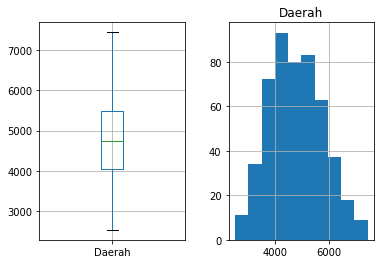

In [34]:
fig, axes = plt.subplots(1, 2)
bxplt_daerah = df.boxplot(column=["Daerah"], ax=axes[0])
hist_daerah = df.hist(column=["Daerah"], ax=axes[1])

Dari boxplot, dapat diketahui bahwa tidak ada *outlier* pada kolom Daerah. Mediannya berada di antara 4000 dan 5000, sedangkan modusnya juga berada di antara 4000 dan 5000. Nilai terkecil pada Daerah di bawah 3000 dan nilai terbesarnya (tidak termasuk *outlier*) di atas 7000. Kuartil 1 berada di kisaran 4000-an, kuartil 3 berada di kisaran 5500-an, yang berarti jangkauan interkuartilnya adalah 1500-an. Nilai skewness yang dimiliki condong ke positif dan kurtosis yang dimiliki condong ke negatif.

## SumbuUtama

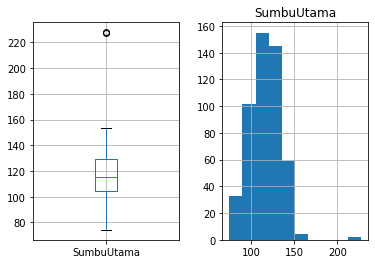

In [35]:
fig, axes = plt.subplots(1, 2)
bxplt_su = df.boxplot(column=["SumbuUtama"], ax=axes[0])
hist_su = df.hist(column=["SumbuUtama"], ax=axes[1])

Dapat diketahui dari boxplotnya bahwa terdapat *outlier*, yaitu dengan nilai di atas 220, untuk kolom SumbuUtama. Median, atau  kuartil 2, yang dimiliki SumbuUtama adalah dalam kisaran 118 dengan modusnya yang berada di antara 100 dan 120, dengan jumlah perkiraan 158. Nilai terkecil yang dimiliki SumbuUtama adalah 105-an, sedangkan nilai terbesarnya adalah 130-an, dengan catatan bahwa kedua nilai tersebut tidak temasuk *outlier*. Kuartil 1 berada di antara 100 dan 110 dan kuartil 3 berada di antara 120 dan 130, yang berarti jangkauan interkuartilnya dalam kisaran 20. Skewness yang dimiliki SumbuUtama bernilai positif dengan kurtosisnya bernilai positif.

## SumbuKecil

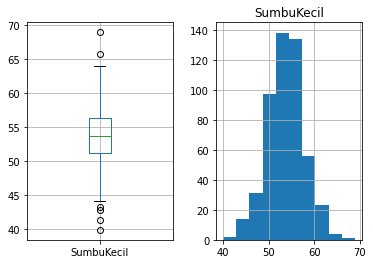

In [36]:
fig, axes = plt.subplots(1, 2)
bxplt_sk = df.boxplot(column=["SumbuKecil"], ax=axes[0])
hist_sk = df.hist(column=["SumbuKecil"], ax=axes[1])

SumbuKecil memiliki beberapa *outlier* yang dapat dilihat pada boxplotnya. *Outlier*-nya banyak terdapat di bawah nilai terkecilnya, yaitu 43-44, dan di atas nilai terbesarnya juga, yaitu 63-64, dengan catatan bahwa kedua nilai tersebut tidak termasuk *outlier*. Median, atau nilai tengahnya, berada di 53-54, sedangkan modusnya berada di antara 50-55 (dengan jumlahnya 138-139). Kuartil 1-nya berada di 52-53 dan kuartil 3-nya berada di 57-58, dengan kesimpulannya jangkauan interkuartilnya berkisar 5. Berdasarkan *histogram*-nya, dapat diperkirakan bahwa skewnessnya mendekati 0 (karena bentuknya yang hampir simetris), yang berarti nilai kurtosisnya mendekati 0, dengan kecenderungan positif.

## Keunikan

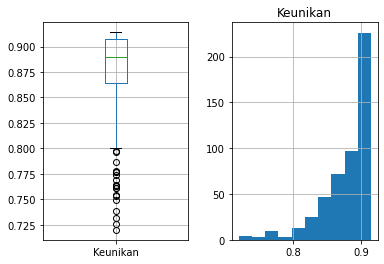

In [37]:
fig, axes = plt.subplots(1, 2)
bxplt_unik = df.boxplot(column=["Keunikan"], ax=axes[0])
hist_unik = df.hist(column=["Keunikan"], ax=axes[1])

Terdapat banyak *outlier* yang dapat dilihat pada boxplot untuk kolom Keunikan dan berada di bawah nilai terkecil. Nilai terkecil (tidak termasuk *outlier*) yang dimiliki adalah 0.8, sedangkan nilai terbesarnya berkisar 0.95. Kuartil 1 yang dimiliki berkisar di 0.863-an, kuartil 2 (median) berkisar di 0.889, dan kuartil 3 berkisar di 0.91, yang berarti nilai jangkauan interkuartilnya berkisar di 0.047-an. Dari histogram, dapat ditarik kesimpulan bahwa modusnya berkisar di 0.92. Selain itu, didapatkan kesimpulan juga bahwa nilai skewness yang dimiliki cenderung negatif, karena bentuknya yang *left-skewed*, sedangkan nilai kurtosisnya cenderung positif.

## AreaBulatan

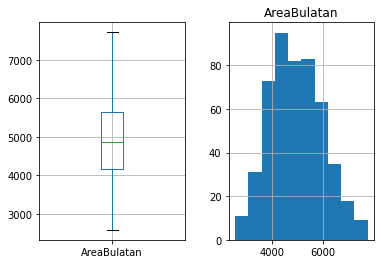

In [38]:
fig, axes = plt.subplots(1, 2)
bxplt_area = df.boxplot(column=["AreaBulatan"], ax=axes[0])
hist_area = df.hist(column=["AreaBulatan"], ax=axes[1])

Kolom AreaBulatan tidak memiliki *outlier* yang dapat dilihat pada boxplotnya. Nilai terkecil yang dimiliki kolom ini berada di bawah 3000, sedangkan nilai terbesarnya berada di atas 7000 (mendekati 8000). Nilai tengah yang dimiliki berkisar 4900, selain itu kuartil 1 yang dimliki berkisar 4100-4200 dengan kuartil 3 yang dimiliki berkisar 5600-5700, yang berarti jangkauan interkuartilnya kurang lebih bernilai 500. Nilai terbanyak terdapat di antara 4100-3500, dengan jumlahnya melebihi 90. Berdasarkan histogramnya, dapat diketahui bahwa nilai skewness akan cenderung bernilai positif (karena 'buntut' pada sebelah kanan lebih lebar), sedangkan kurtosisnya akan cenderung bernilai negatif (karena 'buntut' pada sebelah kiri dan kanan masih tergolong tinggi)

## Diameter

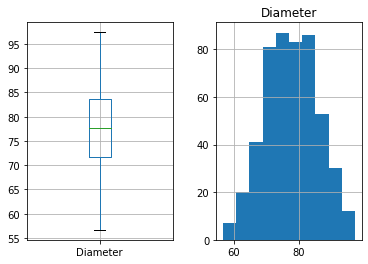

In [39]:
fig, axes = plt.subplots(1, 2)
bxplt_diameter = df.boxplot(column=["Diameter"], ax=axes[0])
hist_diameter = df.hist(column=["Diameter"], ax=axes[1])

Tidak terdapat *outlier* untuk kolom Diameter. Nilai terkecil yang dimiliki berkisar di antara 56-57 dengan nilai terbesar yang dimiliki berkisar di antara 97-98, sedangkan nilai terbanyaknya (modus) berkisar di 75-an (dengan jumlahnya di atas 80). Selain itu, didapatkan kesimpulan juga bahwa kuartil 1 yang dimiliki bernilai 71-72, kuartil 2 yang dimiliki bernilai 77-78, dan kuartil 3 yang dimiliki bernilai 83-84, dengan kesimpulan nilai jangkauan interkuartilnya berkisar 4. Dari histogram, dapat dilihat bahwa nilai skewnessnya mendekati 0 dan nilai kurtosis cenderung negatif.

## KadarAir

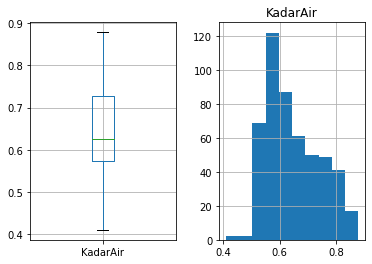

In [40]:
fig, axes = plt.subplots(1, 2)
bxplt_kadar = df.boxplot(column=["KadarAir"], ax=axes[0])
hist_kadar = df.hist(column=["KadarAir"], ax=axes[1])

Dapat dilihat bahwa tidak ada *outlier* yang terlihat pada boxplot untuk KadarAir. Dari boxplot, didapatkan kesimpulan bahwa nilai terkecilnya berkisar 0.40-0.41 dan nilai terbesarnya berkisar 0.87-0.88. Nilai tengah yang dimilikinya berkisar 0.62-0.63. Selain itu, dapat dilihat bahwa kuartil 1 bernilai 0.57-0.58 dan kuartil 3 bernilai 0.72-0.73, dengan jangkauan interkuartilnya berkisar 0.2. Dengan menggunakan histogram, dapat dilihat bahwa nilai terbanyaknya terdapat di antara 0.55-0.6, dengan jumlahnya 121-122. Nilai skewness dapat dilihat dengan menggunakan boxplot dan histogram, dengan kesimpulan nilai skewness cenderung positif, dan nilai kurtosis, berdasarkan histogram, cenderung negatif.

## Keliling

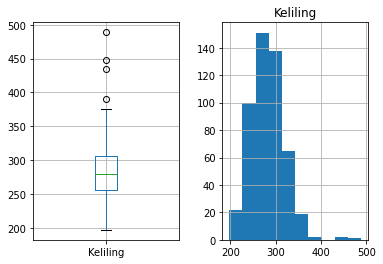

In [41]:
fig, axes = plt.subplots(1, 2)
bxplt_keliling = df.boxplot(column=["Keliling"], ax=axes[0])
hist_keliling = df.hist(column=["Keliling"], ax=axes[1])

Terdapat beberapa *outlier* yang nilainya di atas nilai terbesarnya, yaitu 375-an, pada Keliling. Nilai terkecil yang dimilikinya adalah 200-an. Nilai terbanyak terdapat di antara 250-275 (jumlahnya berkisar di antara 146-147). Jangkauan interkuartilnya adalah sekitar 50, dengan kesimpulan dari kuartil 1 yang bernilai 250-260 dan kuartil 3 yang bernilai 300-310. Median, atau kuartil 2, bernilai 275-an. Dari histogram, dapat disimpulkan bahwa Keliling memiliki nilai skewness yang positif dan nilai kurtosis yang juga positif.

## Bulatan

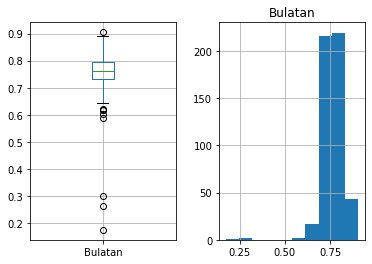

In [42]:
fig, axes = plt.subplots(1, 2)
bxplt_bulatan = df.boxplot(column=["Bulatan"], ax=axes[0])
hist_bulatan = df.hist(column=["Bulatan"], ax=axes[1])

Dari boxplot Bulatan, dapat disimpulkan bahwa terdapat banyak *outlier* di bawah nilai minimal dan *outlier* yang lebih sedikit di atas nilai maksimal. Nilai tengah yang dimiliki Bulatan adalah 0.76-0.77 dan nilai terbanyaknya adalah pada 0.75-0.82 (jumlahnya yang di atas 200). Kuartil 1 yang dimiliki ada pada 0.72-0.73 dan kuartil 3 ada pada 0.80, dengan kesimpulan jangkauan interkuartil berkisar 0.08-0.09. Nilai terkecil dan nilai terbesar, tidak termasuk *outlier*, yang dimiliki adalah 0.64-0.65 dan 0.89-0.90. Skewness yang dimiliki Bulatan cenderung negatif dengan kurtosisnya bernilai positif

## Ransum

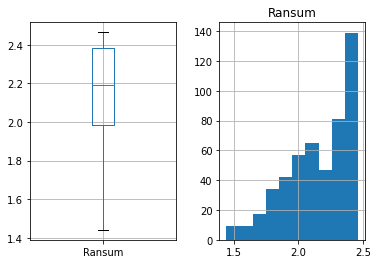

In [43]:
fig, axes = plt.subplots(1, 2)
bxplt_ransum = df.boxplot(column=["Ransum"], ax=axes[0])
hist_ransum = df.hist(column=["Ransum"], ax=axes[1])

Tidak terdapat *outlier* untuk kolom Ransum. Nilai terkecil yang dimilikinya adalah 1.44-1.45 dan nilai terbesarnya adalah 2.46-2.57. Kuartil 1 untuk Ransum adalah 1.99-2.00, sedangkan kuartil 3 untuk Ransum adalah 2.39-2.40, yang berarti perkiraan jangkauan interkuartilnya adalah 0.40. Nilai tengah, atau median, yang dimiliki adalah 2.19-2.20 dan nilai terbanyak, atau modus, berada di 2.37-2.45, yang berjumlah 139. Dari histogramnya, dapat disimpulkan bahwa skewness dan kurtosis memiliki nilai negatif.

# Nomor 3

Daerah (0.003)  	 tidak terdistibusi normal.
SumbuUtama (0.000)  	 tidak terdistibusi normal.
SumbuKecil (0.423)  	 terdistibusi normal.
Keunikan (0.000)  	 tidak terdistibusi normal.
AreaBulatan (0.002)  	 tidak terdistibusi normal.
Diameter (0.118)  	 terdistibusi normal.
KadarAir (0.000)  	 tidak terdistibusi normal.
Keliling (0.000)  	 tidak terdistibusi normal.
Bulatan (0.000)  	 tidak terdistibusi normal.
Ransum (0.000)  	 tidak terdistibusi normal.



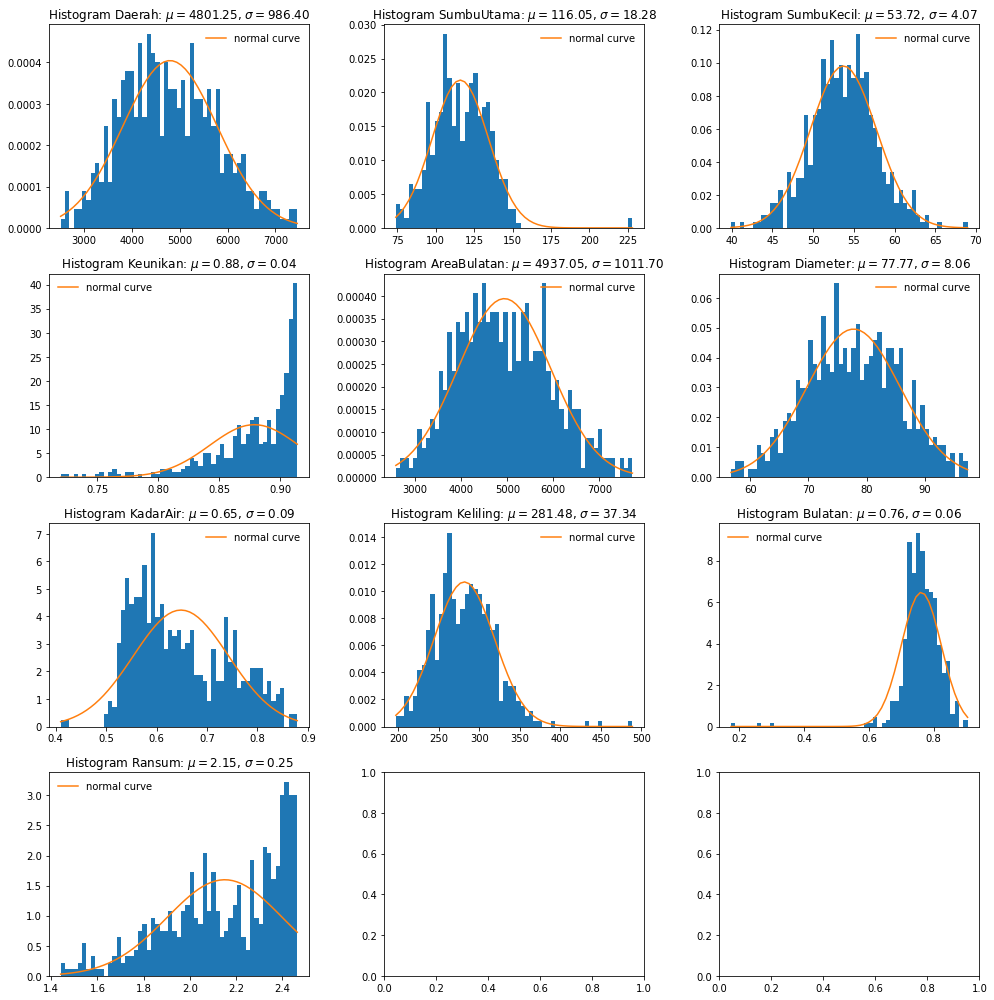

In [44]:
alpha = 0.05

cols = 3
rows = math.ceil(len(dftarget.columns)/cols)

fig, ax = plt.subplots(rows, cols, figsize=(14, 14))

crow = 0
for i, c, in enumerate(dftarget.columns):
    data = dftarget[c]
    mu = data.mean()
    sigma = data.std()

    num_bins = 55

    n, bins, patches = ax[crow, i%cols].hist(data, num_bins, density=True)

    # kurva distribusi normal dari mean dan standard deviation data
    y = np.exp(-0.5 * (1 / sigma * (bins - mu))**2) / (np.sqrt(2 * np.pi) * sigma)
    ax[crow, i%cols].plot(bins, y, label='normal curve')
    ax[crow, i%cols].set_title(r'Histogram {}: $\mu={:.2f}$, $\sigma={:.2f}$'.format(c, mu, sigma))
    ax[crow, i%cols].legend(loc='best', frameon=False)

    shapiroTest = stats.shapiro(data)
    print(c + ' ({:.3f})  \t '.format(shapiroTest[1]), end="")
    if shapiroTest[1] < alpha:
        print('tidak terdistibusi normal.')
    else:
        print('terdistibusi normal.')

    if i%cols == cols-1:
        crow += 1

print()
fig.tight_layout()
plt.show()

## _Normality Test_
_Normality test_ pada nomor ini dilakukan dengan cara mengetes menggunakan _Shapiro-Wilk Test_ serta _plotting_ histogram dan kurva normal dari data kolom yang bersangkutan. 

Tes Shapiro-Wilk mengetes kemiripan histogram dengan kurva distribusi normalnya. Tes tersebut mengganggap bahwa data terdistribusi normal. Jika hasil tes Shapiro-Wilk lebih besar dari 0.05, data terdistribusi normal.

## Daerah
Berdasarkan tes Shapiro-Wilk data kolom daerah datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.003 relatif mendekati 0.05. Dibandingkan dengan histogram dan kurva normalnya, data kolom Daerah terlihat terdistribusi normal  hanya saja pada bagian titik tertinggi kurva data histogram menunjukkan data yang muncul sedikit.

## SumbuUtama
Berdasarkan tes Shapiro-Wilk data kolom SumbuUtama datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.000. Dibandingkan dengan histogram dan kurva normalnya, data kolom SumbuUtama tidak terdistribusi normal sebab histogram dan kurvanya memiliki _skewness_ yang positif dan pencilan.

## SumbuKecil
Berdasarkan tes Shapiro-Wilk, histogram, dan kurva normalnya data kolom SumbuUtama memiliki data yang terdistribusi normal karena memiliki hasil nilai tes sebesar 0.423 serta histogram dan kurva normal yang terlihat terdistribusi normal.

## Keunikan
Berdasarkan tes Shapiro-Wilk data kolom Keunikan datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.000. Dibandingkan dengan histogram dan kurva normalnya, data kolom Keunikan tidak terdistribusi normal sebab histogram dan kurvanya memiliki _skewness_ yang negatif dan kurtosis yang besar.

## AreaBulatan
Berdasarkan tes Shapiro-Wilk data kolom AreaBulatan datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.002 yang relatif mendekati 0.05. Dibandingkan dengan histogram dan kurva normalnya data kolom Daerah hampir terlihat terdistribusi normal namun histogram menunjukkan bahwan pada titik tertinggi kurva normal data sedikit.

## Diameter
Berdasarkan tes Shapiro-Wilk, histogram, dan kurva normalnya data kolom Diameter memiliki data yang terdistribusi normal karena memiliki hasil nilai tes sebesar 0.118 serta histogram dan kurva normal yang terlihat terdistribusi normal.

## KadarAir
Berdasarkan tes Shapiro-Wilk data kolom KadarAir datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.0000. Dibandingkan dengan histogram dan kurva normalnya, data kolom KadarAir hampir terlihat terdistribusi normal namun histogram menunjukkan bahwa pada titik tertinggi kurva normal data sedikit.

## Keliling
Berdasarkan tes Shapiro-Wilk data kolom Keliling datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.000. Dibandingkan dengan histogram dan kurva normalnya, data kolom Keliling tidak terdistribusi normal sebab histogram dan kurvanya memiliki _skewness_ yang positif dan pencilan.

## Bulatan
Berdasarkan tes Shapiro-Wilk data kolom Bulatan datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.000. Dibandingkan dengan histogram dan kurva normalnya, data kolom Bulatan tidak terdistribusi normal sebab histogram dan kurvanya memiliki _skewness_ yang negatif dan _kurtosis_ yang besar.

## Ransum
Berdasarkan tes Shapiro-Wilk data kolom Ransum datanya tidak terdistribusi normal karena memiliki hasil nilai tes sebesar 0.000. Dibandingkan dengan histogram dan kurva normalnya, data kolom Ransum tidak terdistribusi normal sebab histogram dan kurvanya memiliki _skewness_ yang negatif dan kurtosis yang besar.

# Nomor 4

In [45]:
a = 0.05
p = 1-a

## A. Nilai Rata-Rata Daerah di Atas 4700

Daerah kritis		: z > 1.644854
Nilai uji statistik	: Z = 2.295154
P-value			: 0.010862
Keputusan		: H0 ditolak


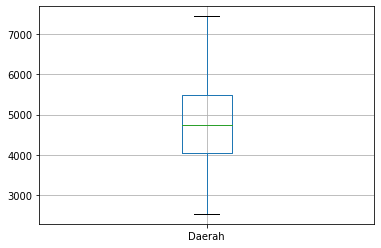

In [46]:
df.boxplot(column="Daerah")
hypo_daerah = 4700
rata_daerah = df["Daerah"].mean()
std_daerah = df["Daerah"].std()
t_daerah = round(stats.norm.ppf(p), 6)
print("Daerah kritis\t\t: z >", t_daerah)

uji_daerah = round((rata_daerah - hypo_daerah)/(std_daerah/(math.sqrt(df["Daerah"].count()))), 6)
print("Nilai uji statistik\t: Z =", uji_daerah)

p_daerah = round(stats.norm.sf(abs(uji_daerah)), 6)
print("P-value\t\t\t:", p_daerah)

print("Keputusan\t\t: H0 ", end='')
if (p_daerah > a):
  print("tidak ditolak")
else:
  print("ditolak")

1. Hipotesis nol H0: μ = 4700
2. Hipotesis alternatif H1: μ > 4700
3. Tingkat signifikan: α = 0.050000
4. Uji statistik: z = 1.644854

   Daerah kritis: z > 1.644854
5. Nilai uji statistik: Z = 2.295154

   *P-value*: 0.010862
6. Keputusan: H0 **ditolak** karena nilai *p-value* yang lebih kecil dari tingkat signifikannya

## B. Nilai Rata-Rata Sumbu Utama Tidak Sama dengan 116

Daerah kritis		: z < -1.959964 dan z > 1.959964
Nilai uji statistik	: Z = 0.055247
P-value			: 0.955942
Keputusan		: H0 tidak ditolak


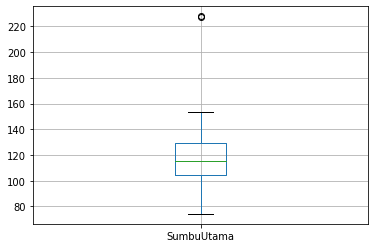

In [47]:
df.boxplot(column="SumbuUtama")
hypo_su = 116
rata_su = df["SumbuUtama"].mean()
std_su = df["SumbuUtama"].std()
t_su = round(stats.norm.ppf(1-(a/2)), 6)
print("Daerah kritis\t\t: z <", (t_su * -1), "dan z >", t_su)

uji_su = round((rata_su - hypo_su)/(std_su/(math.sqrt(df["SumbuUtama"].count()))), 6)
print("Nilai uji statistik\t: Z =", uji_su)

p_su = round(stats.norm.sf(abs(uji_su)) * 2, 6)
print("P-value\t\t\t:", p_su)

print("Keputusan\t\t: H0 ", end='')
if (uji_su > t_su * -1 and uji_su < t_su):
  print("tidak ditolak")
else:
  print("ditolak")

1. Hipotesis nol H0: μ = 116
2. Hipotesis alternatif H1: μ ≠ 116
3. Tingkat signifikan: α = 0.050000
4. Uji statistik: z = 1.959964

   Daerah kritis: z < -1.959964 & z > 1.959964
5. Nilai uji statistik: Z = 0.055247
   
   *P-value*: 0.955942
6. Keputusan: H0 **diterima** dengan nilai uji statistik tidak berada di daerah kritis

## C. Nilai Rata-Rata 20 Baris Pertama Kolom Sumbu Kecil bukan 50

Daerah kritis		: z < -1.959964 dan z > 1.959964
Nilai uji statistik	: Z = 6.478169
P-value			: 0.0
Keputusan		: H0 ditolak


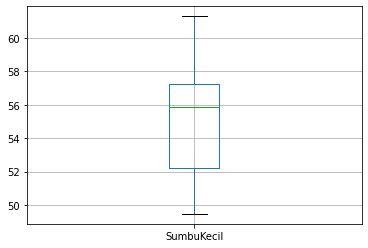

In [48]:
new_sk = df["SumbuKecil"].iloc[:20]
df.iloc[:20].boxplot(column="SumbuKecil")
hypo_sk = 50
rata_sk = new_sk.mean()
std_sk = new_sk.std()
t_sk = round(stats.norm.ppf(1-(a/2)), 6)
print("Daerah kritis\t\t: z <", (t_sk * -1), "dan z >", t_sk)

uji_sk = round((rata_sk - hypo_sk)/(std_sk/(math.sqrt(new_sk.count()))), 6)
print("Nilai uji statistik\t: Z =", uji_sk)

p_sk = round(stats.norm.sf(abs(uji_sk)) * 2, 6)
print("P-value\t\t\t:", p_sk)

print("Keputusan\t\t: H0 ", end='')
if (p_sk > a):
  print("tidak ditolak")
else:
  print("ditolak")

1. Hipotesis nol H0: μ = 50
2. Hipotesis alternatif H1: μ ≠ 50
3. Tingkat signifikan: α = 0.050000
4. Uji statistik: z = 1.959964

   Daerah kritis: z < -1.959964 & z > 1.959964
5. Nilai uji statistik: Z = 6.478169
   
   *P-value*: 0.0
6. Keputusan: H0 **ditolak** dengan alasan *P-value* lebih kecil dari tingkat signifikannya

## D. Proporsi Nilai Diameter yang Lebih dari 85, adalah tidak sama dengan 15%

Jumlah n				: 500
Jumlah Diameter yang nilainya > 85	: 97
Daerah kritis				: z < -1.959964 dan z > 1.959964
Nilai uji statistik			: 2.755386880774658
P-value					: 0.005862
Keputusan				: H0 ditolak


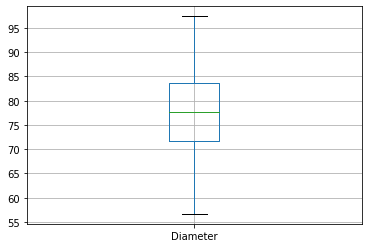

In [49]:
df.boxplot(column="Diameter")
hypo_diameter = 0.15
count_diameter = df["Diameter"].count()
print("Jumlah n\t\t\t\t:", count_diameter)

diameter_85 = df[df["Diameter"] > 85]
count_diameter_85 = diameter_85["Diameter"].count()
print("Jumlah Diameter yang nilainya > 85\t:", count_diameter_85)

t_sk = round(stats.norm.ppf(1-(a/2)), 6)
print("Daerah kritis\t\t\t\t: z <", (t_sk * -1), "dan z >", t_sk)

ratio_diameter = count_diameter_85 / count_diameter
uji_diameter = (ratio_diameter - hypo_diameter)/math.sqrt((hypo_diameter * (1-hypo_diameter))/count_diameter)
print("Nilai uji statistik\t\t\t:", uji_diameter)

p_diameter = round(stats.norm.sf(abs(uji_diameter)) * 2, 6)
print("P-value\t\t\t\t\t:", p_diameter)

print("Keputusan\t\t\t\t: H0 ", end='')
if (uji_diameter > t_sk * -1 and uji_diameter < t_sk):
  print("tidak ditolak")
else:
  print("ditolak")

1. Hipotesis nol H0: μ = 0.15
2. Hipotesis alternatif H1: μ ≠ 0.15
3. Tingkat signifikan: α = 0.050000
4. Uji statistik: z = 1.959964

   Daerah kritis: z < -1.959964 & z > 1.959964
5. Nilai uji statistik: Z = 2.755386880774658
  
   *P-value*: 0.005862
   
6. Keputusan: H0 **ditolak** karena nilai uji statistik yang berada di daerah kritis

## E. Proporsi Nilai Keliling yang Kurang dari 100, adalah Kurang dari 5%

Jumlah n				: 500
Jumlah Diameter yang nilainya < 100	: 0
Daerah kritis				: z < -1.644854
Nilai uji statistik			: -5.129892
P-value					: 0.0
Keputusan				: H0 ditolak


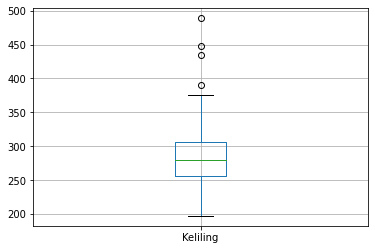

In [50]:
df.boxplot(column="Keliling")
hypo_keliling = 0.05


count_keliling = df["Keliling"].count()
print("Jumlah n\t\t\t\t:", count_keliling)

keliling_100 = df[df["Keliling"] < 100]
count_keliling_100 = keliling_100["Keliling"].count()
print("Jumlah Diameter yang nilainya < 100\t:", count_keliling_100)

t_keliling = round(stats.norm.ppf(p), 6)
print("Daerah kritis\t\t\t\t: z <", t_keliling * -1)

ratio_keliling = count_keliling_100 / count_keliling
uji_keliling = (ratio_keliling - hypo_keliling)/math.sqrt((hypo_keliling * (1-hypo_keliling))/count_keliling)
print("Nilai uji statistik\t\t\t:", round(uji_keliling, 6))

p_keliling = round(stats.norm.sf(abs(uji_keliling)), 6)
print("P-value\t\t\t\t\t:", p_keliling)

print("Keputusan\t\t\t\t: H0 ", end='')
if (p_keliling > a ):
  print("tidak ditolak")
else:
  print("ditolak")

1. Hipotesis nol H0: μ = 0.05
2. Hipotesis alternatif H1: μ < 0.05
3. Tingkat signifikan: α = 0.050000
4. Uji statistik: z = 1.644854

   Daerah kritis: z < -1.644854
5. Nilai uji statistik: Z = -5.129892
   
   *P-value*: 0.0
6. Keputusan: H0 **ditolak** dengan alasan *P-value* lebih kecil dari tingkat signifikannya

# Nomor 5

## A. Rata-rata bagian awal dan bagian akhir kolom AreaBulatan

Uji statistik		: z = 1.644854
Daerah kritis		: z > 1.644854
Nilai uji statistik	: Z = 17.013037
P-value			: 0.000000
Keputusan 		: H0 ditolak


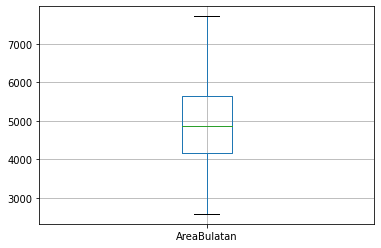

In [51]:
df.boxplot(column='AreaBulatan')
areaBulatan = df['AreaBulatan']
areaBulatan1 = areaBulatan[:int(areaBulatan.count()/2)] # bagian kolom awal
areaBulatan2 = areaBulatan[int(areaBulatan.count()/2):] # bagian kolom akhir

t = stats.norm.ppf(p)
print('Uji statistik\t\t: z = {:.6f}'.format(t))
print('Daerah kritis\t\t: z > {:.6f}'.format(t))

def zvalue(xbar1, xbar2, d0, var1, var2, n1, n2):
    return (xbar1 - xbar2 - d0)/math.sqrt(var1/n1 + var2/n2)

Z = zvalue(areaBulatan1.mean(), areaBulatan2.mean(), 0,
           areaBulatan1.var(), areaBulatan2.var(),
           areaBulatan1.count(), areaBulatan2.count())
pvalue = stats.norm.sf(abs(Z))

print('Nilai uji statistik\t: Z = {:.6f}'.format(Z))
print('P-value\t\t\t: {:.6f}'.format(pvalue))

if pvalue < a or Z > t:
    print('Keputusan \t\t: H0 ditolak')
else:
    print('Keputusan \t\t: H0 tidak ditolak')

1. H0: μ1 - μ2 = 0
2. H1: μ1 - μ2 > 0
3. α = 0.05
4. Uji statistik       = 1.644854
   
   Daerah kritis       = z > 1.644854
5. Nilai uji statistik = 17.013037

   Nilai p-value       = 0.000000
6. Keputusan: H0 **ditolak** karena pvalue lebih kecil α serta hasil uji statistik berada di daerah kritis. Jadi, mean bagian awal dan bagian akhir kolom 'Daerah' tidak sama.

## B. Rata-rata bagian awal dan bagian akhir kolom KadarAir

Uji statistik		: z = 1.644854
Daerah kritis		: z > 1.644854
Nilai uji statistik	: Z = -26.903444
P-value			: 0.000000
Keputusan 		: H0 ditolak


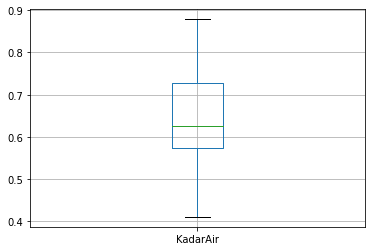

In [52]:
df.boxplot(column='KadarAir')
kadarAir = df['KadarAir']
kadarAir1 = kadarAir[:int(kadarAir.count()/2)] # bagian kolom awal
kadarAir2 = kadarAir[int(kadarAir.count()/2):] # bagian kolom akhir

t = stats.norm.ppf(p)
print('Uji statistik\t\t: z = {:.6f}'.format(t))
print('Daerah kritis\t\t: z > {:.6f}'.format(t))

Z = zvalue(kadarAir1.mean(), kadarAir2.mean(), 0.2,
           kadarAir1.var(), kadarAir2.var(),
           kadarAir1.count(), kadarAir2.count())
pvalue = stats.norm.sf(abs(Z))

print('Nilai uji statistik\t: Z = {:.6f}'.format(Z))
print('P-value\t\t\t: {:.6f}'.format(pvalue))

if pvalue < a or Z > t:
    print('Keputusan \t\t: H0 ditolak')
else:
    print('Keputusan \t\t: H0 tidak ditolak')

1. H0: μ1 - μ2 = 0.2
2. H1: μ1 - μ2 > 0.2
3. α = 0.05
4. Uji statistik       = 1.644854

   Daerah kritis       = z > 1.644854
5. Nilai uji statistik = -26.903444

   Nilai p-value       = 0.000000
6. Keputusan: H0 **tidak ditolak** karena pvalue lebih besar dari α serta hasil uji statistik tidak berada di daerah kritis. Jadi, selisih mean dari bagian awal dan bagian akhir kolom 'KadarAir' dapat dikatakan sebesar 0.2.

## C. Rata-rata 20 baris pertama dan terakhir kolom Bulatan

Uji statistik		: z = 1.959964
Daerah kritis		: z < -1.959964 atau z > 1.959964
Nilai uji statistik	: Z = -3.379227
P-value			: 0.000727
Keputusan 		: H0 ditolak


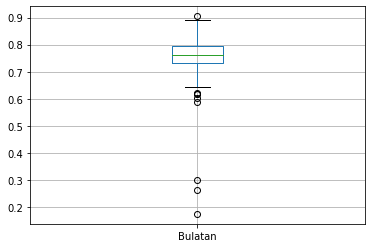

In [53]:
df.boxplot(column='Bulatan')
bulatan = df['Bulatan']
bulatan1 = bulatan[:20]  # 20 baris pertama kolom
bulatan2 = bulatan[-20:] # 20 baris terakhir kolom

t = abs(stats.norm.ppf(a/2))
print('Uji statistik\t\t: z = {:.6f}'.format(t))
print('Daerah kritis\t\t: z < -{:.6f} atau z > {:.6f}'.format(t, t))

Z = zvalue(bulatan1.mean(), bulatan2.mean(), 0,
           bulatan1.var(), bulatan2.var(),
           bulatan1.count(), bulatan2.count())
pvalue = stats.norm.sf(abs(Z))

print('Nilai uji statistik\t: Z = {:.6f}'.format(Z))
print('P-value\t\t\t: {:.6f}'.format(pvalue * 2))

if pvalue < a or (Z < -t or Z > t):
    print('Keputusan \t\t: H0 ditolak')
else:
    print('Keputusan \t\t: H0 tidak ditolak')

1. H0: μ1 - μ2 = 0
2. H1: μ1 - μ2 > 0
3. α = 0.05
4. Uji statistik       = 1.644854

   Daerah kritis       = z > 1.644854
5. Nilai uji statistik = -3.379227

   Nilai p-value       = 0.000727
6. Keputusan: H0 **ditolak** karena pvalue lebih kecil dari α dan hasil uji statistik berada di daerah kritis. Jadi, mean dari 20 baris pertama dan 20 baris terakhir kolom 'Bulatan' dapat dikatakan sama.

## D. Proporsi data bagian awal dan akhir kolom Ransum

Uji statistik		: z = 1.644854
Daerah kritis		: z > 1.644854
Nilai uji statistik	: Z = 13.397486
P-value			: 0.000000
Keputusan 		: H0 ditolak


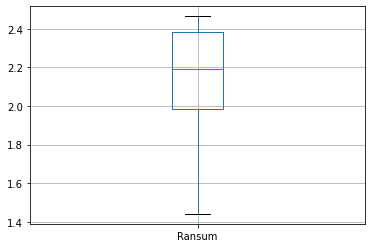

In [54]:
df.boxplot(column='Ransum')
ransum = df['Ransum']
nransum = ransum.count()
ransum1 = ransum[:int(nransum/2)]    # bagian kolom awal
ransum2 = ransum[int(nransum/2):]    # bagian kolom akhir
ransum1_2 = ransum1[ransum1 > 2]     # bagian kolom awal
ransum2_2 = ransum2[ransum2 > 2]     # bagian kolom akhir
nransum1 = ransum1.count()
nransum2 = ransum2.count()
nransum1_2 = ransum1_2.count()
nransum2_2 = ransum2_2.count()

p1 = nransum1_2/nransum1
p2 = nransum2_2/nransum2
p0 = (nransum1_2 + nransum2_2)/nransum

t = stats.norm.ppf(p)
print('Uji statistik\t\t: z = {:.6f}'.format(t))
print('Daerah kritis\t\t: z > {:.6f}'.format(t))

Z = (p1 - p2)/(math.sqrt(p0 * (1-p0) * (1/nransum1 + 1/nransum2)))
pvalue = stats.norm.sf(Z)
print('Nilai uji statistik\t: Z = {:.6f}'.format(Z))
print('P-value\t\t\t: {:.6f}'.format(pvalue))

if pvalue < a or Z > t:
    print('Keputusan \t\t: H0 ditolak')
else:
    print('Keputusan \t\t: H0 tidak ditolak')

1. H0: p1 = p2
2. H1: p1 > p2
3. α = 0.05
4. Uji statistik       = z = 1.644854
   
   Daerah kritis       = z > 1.644854
5. Nilai uji statistik = Z = 13.397486
   
   Nilai p-value       = 0.000000
6. Keputusan: H0 **ditolak** sebab pvalue lebih kecil dari alpha dan hasil uji statistik berada di daerah kritis

## E. Variansi bagian awal dan bagian akhir kolom Diameter

Daerah kritis		: f < 0.779592 atau f > 1.282723
Nilai uji statistik	: f = 1.083878
P-value			: 0.860791
Keputusan 		: H0 ditolak


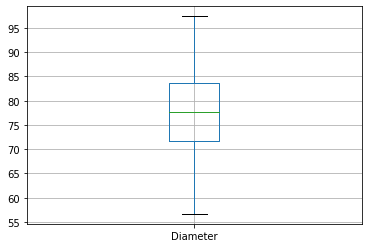

In [55]:
alpha = 0.05
df.boxplot(column='Diameter')
diameter = df['Diameter']
diameter1 = diameter[:int(diameter.count()/2)] # bagian kolom awal
diameter2 = diameter[int(diameter.count()/2):] # bagian kolom akhir

t1 = stats.f.ppf(1-a/2, diameter1.count()-1, diameter2.count()-1)
t2 = stats.f.ppf(a/2, diameter1.count()-1, diameter2.count()-1)

if t1 < t2:
    a = t1
    b = t2
else:
    a = t2
    b = t1

print('Daerah kritis\t\t: f < {:.6f} atau f > {:.6f}'.format(a, b))

if diameter1.var() > diameter2.var():
    a = diameter1.var()
    b = diameter2.var()
else:
    a = diameter2.var()
    b = diameter1.var()

f = a/b
pvalue = stats.norm.cdf(f)

print('Nilai uji statistik\t: f = {:.6f}'.format(f))
print('P-value\t\t\t: {:.6f}'.format(pvalue))

if pvalue < alpha or (f < t1 or f > t2):
    print('Keputusan \t\t: H0 ditolak')
else:
    print('Keputusan \t\t: H0 tidak ditolak')

1. H0: σ1 = σ2
2. H1: σ1 ≠ σ2
3. α = 0.05
4. Daerah kritis       = f < 0.779592 atau f > 1.282723
5. Nilai uji statistik = 1.083878

   Nilai p-value       = 0.860791
6. Keputusan: H0 **tidak ditolak** karena nilai f tidak berada di daerah kritis dan p-value lebih besar dari alpha.

# Nomor 6

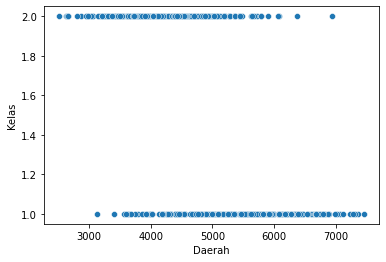

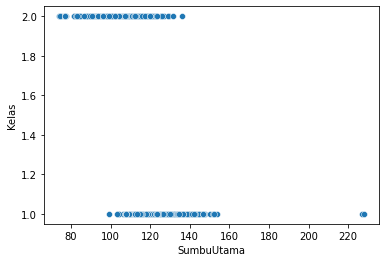

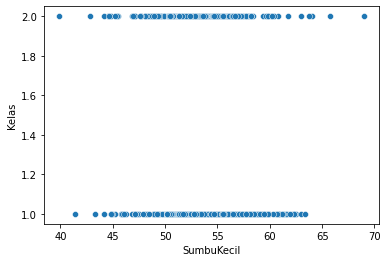

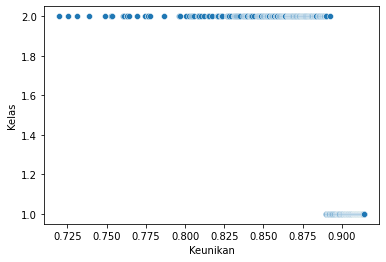

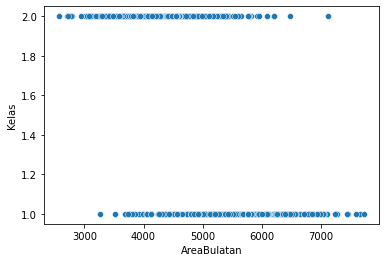

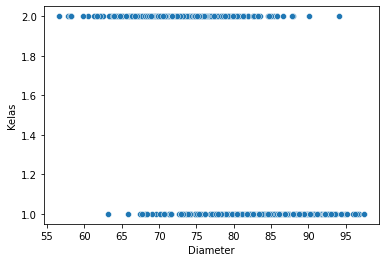

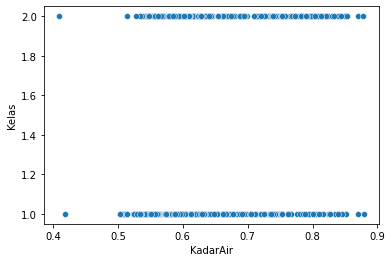

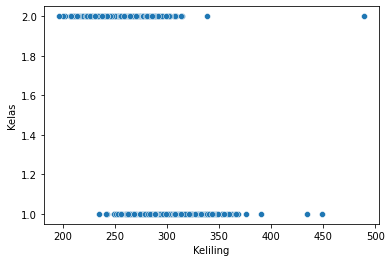

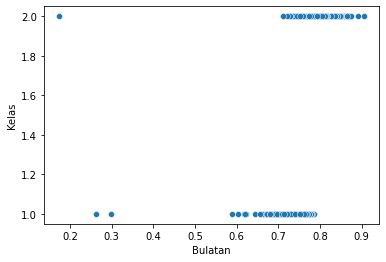

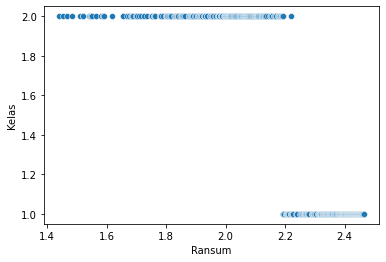

In [56]:
for i in range (len(df.columns)-1):
  fig, axes = plt.subplots(nrows=1, ncols=1)
  sns.scatterplot(data=df, x=df.columns[i], y="Kelas")

In [57]:
df[df.columns[0:]].corr()["Kelas"][:-1]

Daerah        -0.602747
SumbuUtama    -0.713091
SumbuKecil    -0.152975
Keunikan      -0.730456
AreaBulatan   -0.607313
Diameter      -0.602536
KadarAir       0.134344
Keliling      -0.634861
Bulatan        0.545005
Ransum        -0.839904
Name: Kelas, dtype: float64

Fungsi corr() menghitung korelasi antara 2 kolom dengan menggunakan korelasi Pearson. Koefisien dari korelasi Pearson dapat menghasilkan angka yang berjarak dari -1 sampai 1. Berikut adalah penjelasannya:
1.   0.9 - 1: korelasi yang sangat kuat
2.   0.7 - 0.9: korelasi yang kuat
3.   0.5 - 0.7: korelasi yang sedang
4.   0.3 - 0.5: korelasi yang lemah
5.   0 - 0.3: tidak berkorelasi

Dengan nilai positif berarti berbanding lurus dan nilai negatif berbanding terbalik, maka korelasi dari Kelas dengan:
1.   Daerah: korelasi yang **sedang** dan **berbanding terbalik**
2.   Sumbu Utama: korelasi yang **kuat** dan **berbanding terbalik**
3.   Sumbu Kecil: **tidak berkorelasi**
4.   Keunikan: korelasi yang **kuat** dan **berbanding terbalik**
5.   Area Bulatan: korelasi yang **sedang** dan **berbanding terbalik**
6.   Diameter: korelasi yang **sedang** dan **berbanding terbalik**
7.   Kadar Air: **tidak berkorelasi**
8.   Keliling: korelasi yang **sedang** dan **berbanding terbalik**
9.   Bulatan: korelasi yang **sedang** dan **berbanding lurus**
10.  Ransum: korelasi yang **kuat** dan **berbanding terbalik**

Dengan menggunakan fungsi corr(), didapatkan kesimpulan bahwa Ransum memiliki korelasi terkuat dengan Kelas, sedangkan Kadar Air memiliki korelasi terlemah dengan Kelas.

Jika menggunakan *scatter plot*, tidak didapatkan kesimpulan mengenai korelasinya karena pada umumnya analisis korelasi menggunakan *scatter plot* akan memiliki tren menaik, menurun, atau beracakan. Sedangkan, *scatter plot* yang dihasilkan dari kolom target dengan kolom non-target tidak memiliki sebuah tren, maka tidak terdapat kesimpulan untuk metode ini.